# Data & insights for regular newsletter

In [16]:
import bittensor as bt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from substrateinterface import SubstrateInterface

In [18]:
subtensor = bt.subtensor('archive')
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")
block = substrate.get_block()['header']['number']
print(block)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 subtensor = bt.subtensor('archive')                                                          │
│ ❱ 2 substrate = SubstrateInterface(url="wss://34.69.94.173/")                                    │
│   3 block = substrate.get_block()['header']['number']                                            │
│   4 print(block)                                                                                 │
│   5                                                                                              │
│                                                                                                  │
│ /Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/substrateinterface/base.py │
│ :133 in __init__                                                                                 │
│                                                                                                  │
│    130 │   │   self.__rpc_message_queue = []                                                     │
│    131 │   │                                                                                     │
│    132 │   │   if self.url and (self.url[0:6] == 'wss://' or self.url[0:5] == 'ws://'):          │
│ ❱  133 │   │   │   self.connect_websocket()                                                      │
│    134 │   │                                                                                     │
│    135 │   │   elif websocket:                                                                   │
│    136 │   │   │   self.websocket = websocket                                                    │
│                                                                                                  │
│ /Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/substrateinterface/base.py │
│ :183 in connect_websocket                                                                        │
│                                                                                                  │
│    180 │   │   """                                                                               │
│    181 │   │   if self.url and (self.url[0:6] == 'wss://' or self.url[0:5] == 'ws://'):          │
│    182 │   │   │   self.debug_message("Connecting to {} ...".format(self.url))                   │
│ ❱  183 │   │   │   self.websocket = create_connection(                                           │
│    184 │   │   │   │   self.url,                                                                 │
│    185 │   │   │   │   **self.ws_options                                                         │
│    186 │   │   │   )                                                                             │
│                                                                                                  │
│ /Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/websocket/_core.py:646 in  │
│ create_connection                                                                                │
│                                                                                                  │
│   643 │   │   **options,                                                                         │
│   644 │   )                                                                                      │
│   645 │   websock.settimeout(timeout if timeout is not None else getdefaulttimeout())            │
│ ❱ 646 │   websock.connect(url, **options)                                                        │
│   647 │   return websock                                                                         │
│   648                                                      

In [5]:
step = 7200
period_in_days = 14
blocks = range(block - step*period_in_days, block, 7200)
#jour block 2735000: 10 avril
# find block timestamp
today = datetime.today().date()
start_date = (today - relativedelta(days=period_in_days))
days_since_start = 0
print(block, blocks)

3126574 range(3025774, 3126574, 7200)


In [9]:
emissions_latest = {}
for i in range(0, 39):  # change the range when subnet counts increases
    emissions_latest[i] = float(subtensor.get_emission_value_by_subnet(i, block)) 

# get top 10, bottom 10, and middle subnets subnets   
sorted_dict = dict(sorted(emissions_latest.items(), key=lambda item: item[1], reverse=True))
top10_subnets = list(sorted_dict.keys())[:10]
bottom10_subnets = list(sorted_dict.keys())[-10:]
middle_subnets= [value for value in range(0, 39) if value not in set(top10_subnets + bottom10_subnets)]

In [10]:
emissions_data_top10 = {}
emissions_data_bottom10 = {}
emissions_data_middle = {}

for block in blocks:
    top10_subnets_emissions = {}
    bottom10_subnets_emissions = {}
    middle_subnets_emissions = {}

    date = (start_date + relativedelta(days=days_since_start)).strftime('%Y-%m-%d')
    days_since_start += 1
    # print(block, date)

    for i in top10_subnets:
        top10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_top10[date] = top10_subnets_emissions

    
    for i in bottom10_subnets:
        bottom10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_bottom10[date] = bottom10_subnets_emissions

    
    for i in middle_subnets:
        middle_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_middle[date] = middle_subnets_emissions

emissions_data_top10 = pd.DataFrame(emissions_data_top10).T
emissions_data_bottom10 = pd.DataFrame(emissions_data_bottom10).T
emissions_data_middle = pd.DataFrame(emissions_data_middle).T

In [13]:
print(emissions_data_top10.iloc[-1].sum())
print(emissions_data_middle.iloc[-1].sum())
print(emissions_data_bottom10.iloc[-1].sum())
print(emissions_data_top10.iloc[-1].sum() + emissions_data_middle.iloc[-1].sum() + emissions_data_bottom10.iloc[-1].sum())

0.62837709
0.360102851
0.01152004
0.999999981


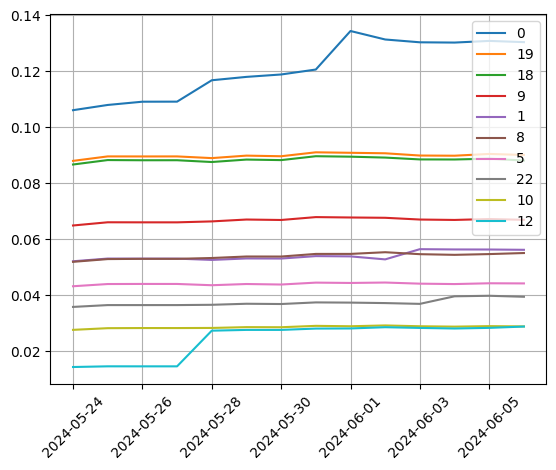

In [14]:
emissions_data_top10.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.show()